In [35]:
import os
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
chinese_raw_df = pd.read_csv("../data/chinese_loan_data.csv", low_memory=False)

In [3]:
selected_columns = [
    'Recipient',
    'Recipient ISO-3',
    'Recipient Region',
    'Commitment Year',
    'Amount (Original Currency)',
    'Amount (Nominal USD)',
    'Interest Rate',
    'Default Interest Rate'
]

chinese_finance_df = chinese_raw_df[selected_columns]

chinese_finance_df

,Recipient,Recipient ISO-3,Recipient Region,Commitment Year,Amount (Original Currency),Amount (Nominal USD),Interest Rate,Default Interest Rate
0,Afghanistan,AFG,Asia,2021,550000000.0,7.111456e+06,NaN,NaN
1,Afghanistan,AFG,Asia,2021,12600000.0,1.260000e+07,NaN,NaN
2,Afghanistan,AFG,Asia,2021,14400000.0,1.440000e+07,NaN,NaN
3,Afghanistan,AFG,Asia,2021,13000000.0,1.300000e+07,NaN,NaN
4,Afghanistan,AFG,Asia,2021,7500000.0,7.500000e+06,NaN,NaN
...,...,...,...,...,...,...,...,...
20980,Zimbabwe,ZWE,Africa,2000,20000000.0,2.415899e+06,0.0,NaN
20981,Zimbabwe,ZWE,Africa,2000,5000000.0,6.039747e+05,NaN,NaN
20982,Zimbabwe,ZWE,Africa,2000,48200000.0,5.822316e+06,3.0,NaN
20983,Zimbabwe,ZWE,Africa,2000,NaN,NaN,NaN,NaN


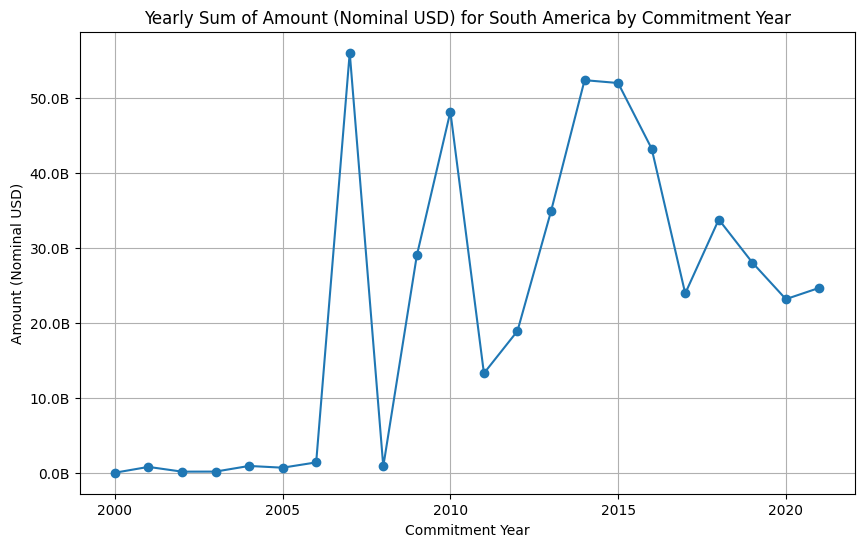

In [27]:
# Filter the DataFrame to include only rows where 'Recipient Region' is 'America'
south_america_df = chinese_finance_df[chinese_finance_df['Recipient Region'] == 'America']

# Group by 'Commitment Year' and sum 'Amount (Nominal USD)'
yearly_sum_south_america = south_america_df.groupby('Commitment Year')[
    'Amount (Nominal USD)'].sum().reset_index()

def billions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fB' % (x * 1e-9)

formatter = FuncFormatter(billions)

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_sum_south_america['Commitment Year'],
         yearly_sum_south_america['Amount (Nominal USD)'], marker='o')
plt.xlabel('Commitment Year')
plt.ylabel('Amount (Nominal USD)')
plt.title('Yearly Sum of Amount (Nominal USD) for South America by Commitment Year')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

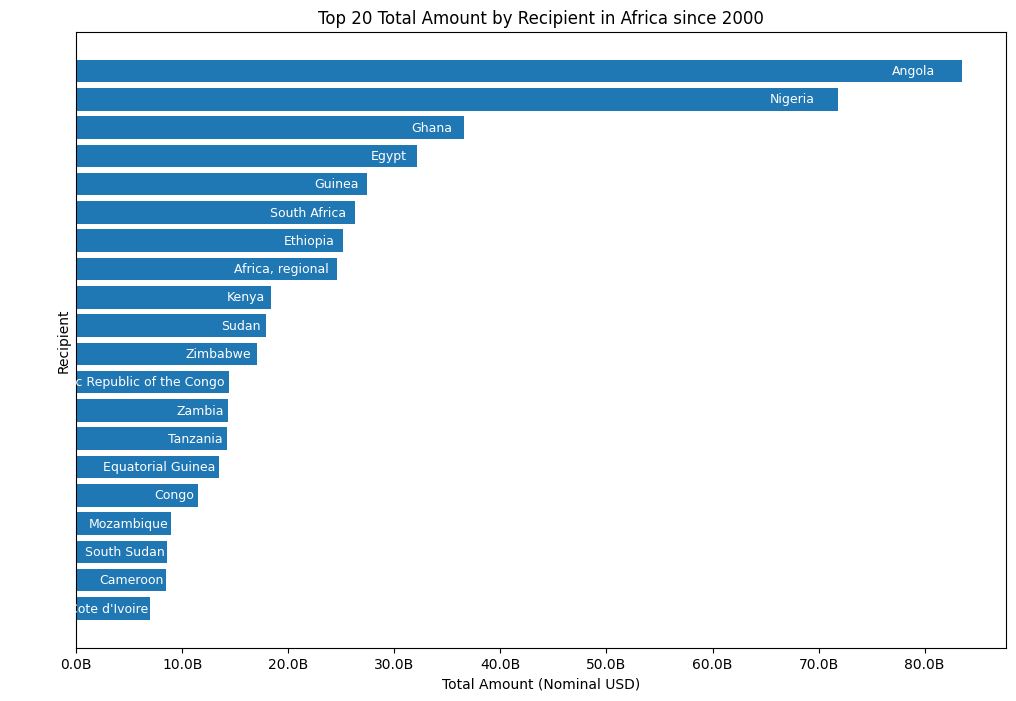

In [22]:
# Filter the DataFrame to include only rows where 'Recipient Region' is 'Africa'
africa_df = chinese_finance_df[chinese_finance_df['Recipient Region'] == 'Africa']

# Group by 'Recipient' and sum 'Amount (Nominal USD)'
recipient_sum_africa = africa_df.groupby('Recipient')['Amount (Nominal USD)'].sum().reset_index()

# Sort the DataFrame by 'Amount (Nominal USD)' and select the top 20 recipients
top_20_recipients = recipient_sum_africa.sort_values(by='Amount (Nominal USD)', ascending=False).head(20)

# Sort the top 20 recipients for better visualization
top_20_recipients = top_20_recipients.sort_values(by='Amount (Nominal USD)', ascending=True)


def billions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fB' % (x * 1e-9)


formatter = FuncFormatter(billions)

# Plotting the horizontal bar graph
plt.figure(figsize=(12, 8))
bars = plt.barh(top_20_recipients['Recipient'], top_20_recipients['Amount (Nominal USD)'])
plt.xlabel('Total Amount (Nominal USD)')
plt.ylabel('Recipient')
plt.title('Top 20 Total Amount by Recipient in Africa since 2000')

# Adding the recipient names inside the bars
for bar, recipient in zip(bars, top_20_recipients['Recipient']):
    width = bar.get_width()
    plt.text(width - (width * 0.03), bar.get_y() + bar.get_height()/2, 
             recipient, va='center', ha='right', color='white', fontsize=9)

# Remove y-axis labels
plt.yticks([])
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

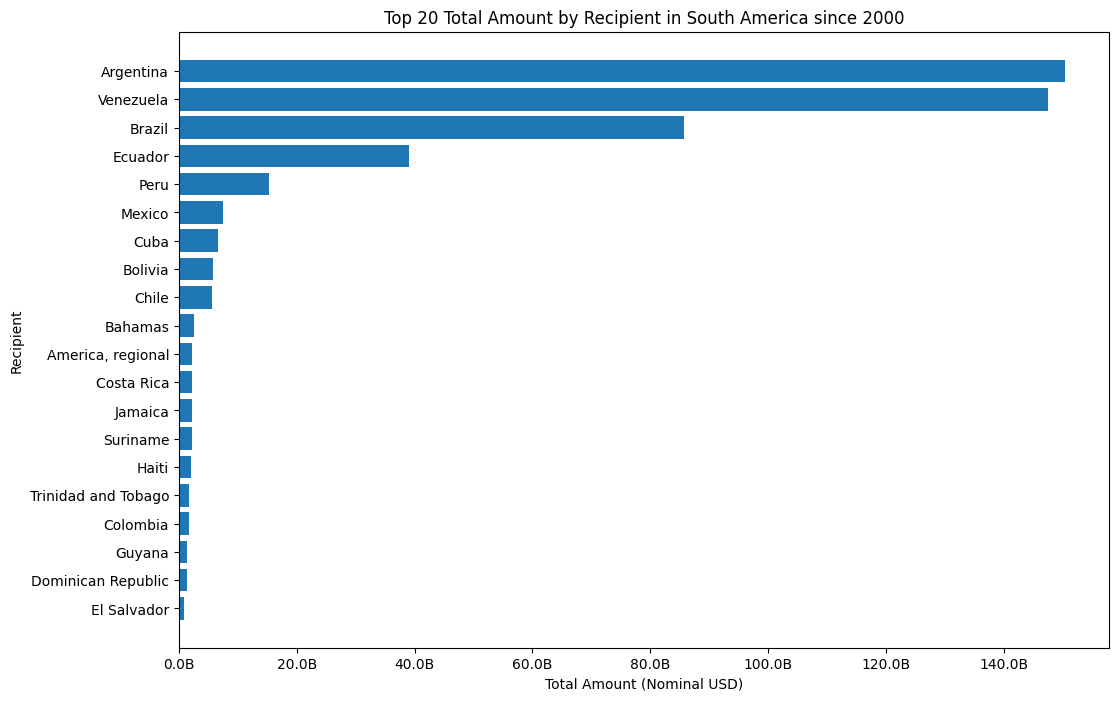

In [7]:
# Filter the DataFrame to include only rows where 'Recipient Region' is 'Africa'
south_america_df = chinese_finance_df[chinese_finance_df['Recipient Region'] == 'America']

# Group by 'Recipient' and sum 'Amount (Nominal USD)'
recipient_sum_south_america = south_america_df.groupby(
    'Recipient')['Amount (Nominal USD)'].sum().reset_index()

# Sort the DataFrame by 'Amount (Nominal USD)' and select the top 20 recipients
top_20_recipients_sa = recipient_sum_south_america.sort_values(
    by='Amount (Nominal USD)', ascending=False).head(20)

# Sort the top 20 recipients for better visualization
top_20_recipients_sa = top_20_recipients_sa.sort_values(
    by='Amount (Nominal USD)', ascending=True)


def billions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fB' % (x * 1e-9)


formatter = FuncFormatter(billions)

# Plotting the horizontal bar graph
plt.figure(figsize=(12, 8))
bars = plt.barh(top_20_recipients_sa['Recipient'],
                top_20_recipients_sa['Amount (Nominal USD)'])
plt.xlabel('Total Amount (Nominal USD)')
plt.ylabel('Recipient')
plt.title('Top 20 Total Amount by Recipient in South America since 2000')

# Remove y-axis labels
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

In [43]:
# Filter the DataFrame to include only rows where 'Recipient Region' is 'Africa'
africa_df = chinese_finance_df[chinese_finance_df['Recipient Region'] == 'Africa']

# Group by 'Recipient' and sum 'Amount (Nominal USD)' for all years
recipient_sum_total = africa_df.groupby(
    'Recipient')['Amount (Nominal USD)'].sum().reset_index()

# Create the choropleth map using Plotly
fig = px.choropleth(recipient_sum_total,
                    locations='Recipient',
                    locationmode='country names',
                    color='Amount (Nominal USD)',
                    hover_name='Recipient',
                    color_continuous_scale='Algae',
                    projection='natural earth',
                    title='Total Amount by Recipient in Africa 2000-2021',
                    scope='africa')

fig.update_geos(showcoastlines=True, coastlinecolor="Black",
                showland=True, landcolor="White")

fig.show()

In [40]:
# Assuming chinese_finance_df is your DataFrame

# Filter for Africa
africa_df = chinese_finance_df[chinese_finance_df['Recipient Region'] == 'Africa']


def create_choropleth(year, africa_df):
    df_year = africa_df[africa_df['Commitment Year'] == year]
    recipient_sum_year = df_year.groupby(
        'Recipient')['Amount (Nominal USD)'].sum().reset_index()

    fig = px.choropleth(recipient_sum_year,
                        locations='Recipient',
                        locationmode='country names',
                        color='Amount (Nominal USD)',
                        hover_name='Recipient',
                        color_continuous_scale='Algae',
                        title=f'Total Amount by Recipient in Africa ({year})')
    fig.update_geos(scope='africa', showcoastlines=True,
                    coastlinecolor="Black", showland=True, landcolor="White")
    return fig


# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=('2005', '2010', '2015', '2020'),
                    specs=[[{'type': 'choropleth'}, {'type': 'choropleth'}],
                           [{'type': 'choropleth'}, {'type': 'choropleth'}]])

# Put the subplots on the map
years = [2005, 2010, 2015, 2020]
for i, year in enumerate(years):
    choropleth = create_choropleth(year, africa_df)
    for trace in choropleth.data:
        fig.add_trace(trace, row=i//2+1, col=i % 2+1)

# Update layout
fig.update_layout(height=800, width=1200,
                  title_text="Total Amount by Recipient in Africa from 2005 to 2020")

fig.show()

In [51]:
# We animate this now.

# Filter region to Africa
africa_df = chinese_finance_df[chinese_finance_df['Recipient Region'] == 'Africa']

# The years were looping weirdly, so we're setting them as an integer.
africa_df['Commitment Year'] = africa_df['Commitment Year'].astype(int)

# We want totals for each year. Groupby 'Recipient' and 'Commitment Year', then sum 'Amount (Nominal USD)'
recipient_sum_yearly = africa_df.groupby(['Recipient', 'Commitment Year'])[
    'Amount (Nominal USD)'].sum().reset_index()

# Now that we've set them as integers we sort the years to make sure they're in order.
recipient_sum_yearly = recipient_sum_yearly.sort_values(by='Commitment Year')

# Create the animated choropleth map using Plotly. Algae color scheme is best for my colorblind ass.
fig = px.choropleth(recipient_sum_yearly,
                    locations='Recipient',
                    locationmode='country names',
                    color='Amount (Nominal USD)',
                    hover_name='Recipient',
                    animation_frame='Commitment Year',
                    color_continuous_scale='Algae',
                    scope='africa',
                    title='Chinese Loans in Africa from 2000 to 2021')

fig.update_geos(showcoastlines=True, coastlinecolor="Black",
                showland=True, landcolor="White")

fig.show()

C:\Users\darks\AppData\Local\Temp\ipykernel_9212\3283917966.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
# We animate this now.

# Filter region to Africa
south_america_animate_df = chinese_finance_df[chinese_finance_df['Recipient Region'] == 'America']

# The years were looping weirdly, so we're setting them as an integer.
south_america_animate_df['Commitment Year'] = south_america_animate_df['Commitment Year'].astype(
    int)

# We want totals for each year. Groupby 'Recipient' and 'Commitment Year', then sum 'Amount (Nominal USD)'
sa_recipient_sum_yearly = south_america_animate_df.groupby(['Recipient', 'Commitment Year'])[
    'Amount (Nominal USD)'].sum().reset_index()

# Now that we've set them as integers we sort the years to make sure they're in order.
sa_recipient_sum_yearly = sa_recipient_sum_yearly.sort_values(by='Commitment Year')

# Create the animated choropleth map using Plotly. Algae color scheme is best for my colorblind ass.
fig = px.choropleth(sa_recipient_sum_yearly,
                    locations='Recipient',
                    locationmode='country names',
                    color='Amount (Nominal USD)',
                    hover_name='Recipient',
                    animation_frame='Commitment Year',
                    color_continuous_scale='Algae',
                    scope='south america',
                    title='Chinese Loans in South America from 2000 to 2021')

fig.update_geos(showcoastlines=True, coastlinecolor="Black",
                showland=True, landcolor="White")

fig.show()

C:\Users\darks\AppData\Local\Temp\ipykernel_9212\539698172.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

